In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

wine_data = load_wine()
X = wine_data.data
y = wine_data.target

dt_classifier = DecisionTreeClassifier(min_samples_leaf=3, random_state=1)
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=3, random_state=1), n_estimators=100, random_state=1)
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=3),
                                        algorithm='SAMME', n_estimators=100, random_state=1)
gb_classifier = GradientBoostingClassifier(learning_rate=1.0, subsample=0.5,
                                           n_estimators=100, max_depth=1,random_state=1)

cv = StratifiedKFold(n_splits=5)

classifiers = [dt_classifier, bagging_classifier, adaboost_classifier, gb_classifier]
classifier_names = ['Decision Tree', 'Bagging', 'AdaBoost', 'Gradient Boosting']

for clf, name in zip(classifiers, classifier_names):
    scores = cross_val_score(clf, X, y, cv=cv)
    average_accuracy = scores.mean()
    print(f'{name} scores: {scores}, {name} Average Accuracy: {average_accuracy:.4f}')

Decision Tree scores: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857], Decision Tree Average Accuracy: 0.8883
Bagging scores: [0.91666667 0.88888889 0.94444444 0.97142857 1.        ], Bagging Average Accuracy: 0.9443
AdaBoost scores: [0.83333333 0.88888889 0.91666667 1.         1.        ], AdaBoost Average Accuracy: 0.9278
Gradient Boosting scores: [0.91666667 0.94444444 1.         0.97142857 1.        ], Gradient Boosting Average Accuracy: 0.9665


In [4]:
gb_classifier.fit(X, y)
cumulative_improvement = np.cumsum(gb_classifier.oob_improvement_)


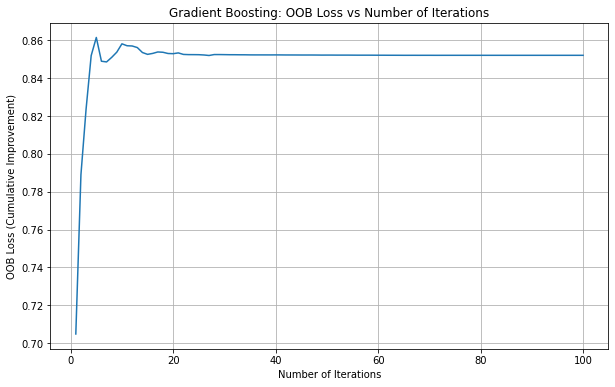

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_improvement) + 1), cumulative_improvement)
plt.xlabel('Number of Iterations')
plt.ylabel('OOB Loss (Cumulative Improvement)')
plt.title('Gradient Boosting: OOB Loss vs Number of Iterations')
plt.grid(True)
plt.show()